In [1]:
import os
from src.dataset import Dataset
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/

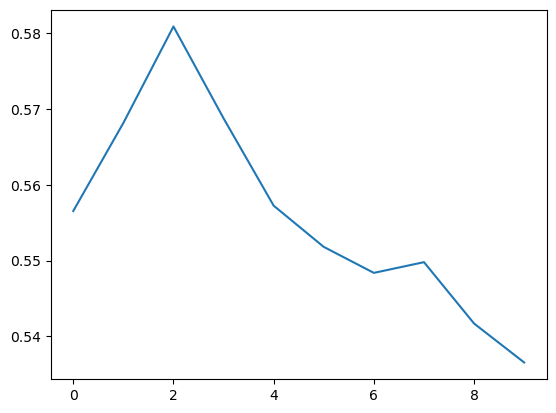

In [4]:
from src.reactions.da.da_dataset import XtbSimulatedDADataset

dataset = XtbSimulatedDADataset(
    csv_file_path="da/xtb_simulated_da_no_solvent.csv"
)

scores = []
for marg in np.linspace(0, 10, 10):

    df = dataset.load(
        aggregation_mode='avg',
        margin=marg / 627.5
    )

    targets, preds = [], []
    for idx in df['reaction_idx'].unique():
        target = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['labels']
        pred = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 1)]['label']

        if len(pred) > 0 and len(target) > 0:
            targets.append(target.values[0])
            preds.append(pred.values[0])

    scores.append(roc_auc_score(targets, preds))
plt.plot(np.arange(len(scores)), scores)

In [5]:
scores

[0.5565292815696596,
 0.5681417120296703,
 0.5808608003828438,
 0.568747382903631,
 0.5572321588801818,
 0.5517960758509302,
 0.5483714183166837,
 0.5497846503559252,
 0.5416940838667226,
 0.5365570975653526]

/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/

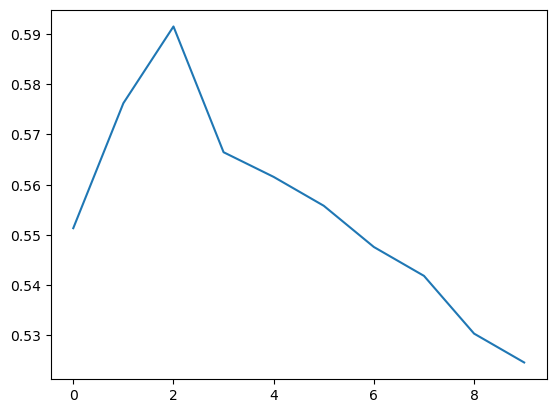

In [9]:
from src.reactions.da.da_dataset import XtbSimulatedDADataset

dataset = XtbSimulatedDADataset(
    csv_file_path="da/xtb_simulated_da_solvent.csv"
)

scores = []
for marg in np.linspace(0, 10, 10):

    df = dataset.load(
        aggregation_mode='avg',
        margin=marg / 627.5
    )

    targets, preds = [], []
    for idx in df['reaction_idx'].unique():
        target = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['label']
        pred = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 1)]['label']

        if len(pred) > 0 and len(target) > 0:
            targets.append(target.values[0])
            preds.append(pred.values[0])

    scores.append(roc_auc_score(targets, preds))
plt.plot(np.arange(len(scores)), scores)

In [10]:
scores

[0.5513460375075621,
 0.5762250453720508,
 0.5915003024803387,
 0.5664700544464609,
 0.5615547489413188,
 0.5558076225045373,
 0.5476028433151845,
 0.5418557168784028,
 0.5303614640048397,
 0.5246143375680581]